# Artificial Neural Network

#### Build ANN model on forest fire dataset. Predict the burnt area of forest fires based on attributes.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#import dataset
forest_df = pd.read_csv(r"D:\360digi\DS\Sharath\Neural_Network_Master_Class\handson\Datasets_ANN Assignment\fireforests.csv")
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     517 non-null    object 
 1   day       517 non-null    object 
 2   FFMC      517 non-null    float64
 3   DMC       517 non-null    float64
 4   DC        517 non-null    float64
 5   ISI       517 non-null    float64
 6   temp      517 non-null    float64
 7   RH        517 non-null    int64  
 8   wind      517 non-null    float64
 9   rain      517 non-null    float64
 10  area      517 non-null    float64
 11  dayfri    517 non-null    int64  
 12  daymon    517 non-null    int64  
 13  daysat    517 non-null    int64  
 14  daysun    517 non-null    int64  
 15  daythu    517 non-null    int64  
 16  daytue    517 non-null    int64  
 17  daywed    517 non-null    int64  
 18  monthapr  517 non-null    int64  
 19  monthaug  517 non-null    int64  
 20  monthdec  517 non-null    int64 

In [5]:
forest_df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
forest_df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# check missing values
forest_df.isnull().sum()

month       0
day         0
FFMC        0
DMC         0
DC          0
ISI         0
temp        0
RH          0
wind        0
rain        0
area        0
dayfri      0
daymon      0
daysat      0
daysun      0
daythu      0
daytue      0
daywed      0
monthapr    0
monthaug    0
monthdec    0
monthfeb    0
monthjan    0
monthjul    0
monthjun    0
monthmar    0
monthmay    0
monthnov    0
monthoct    0
monthsep    0
dtype: int64

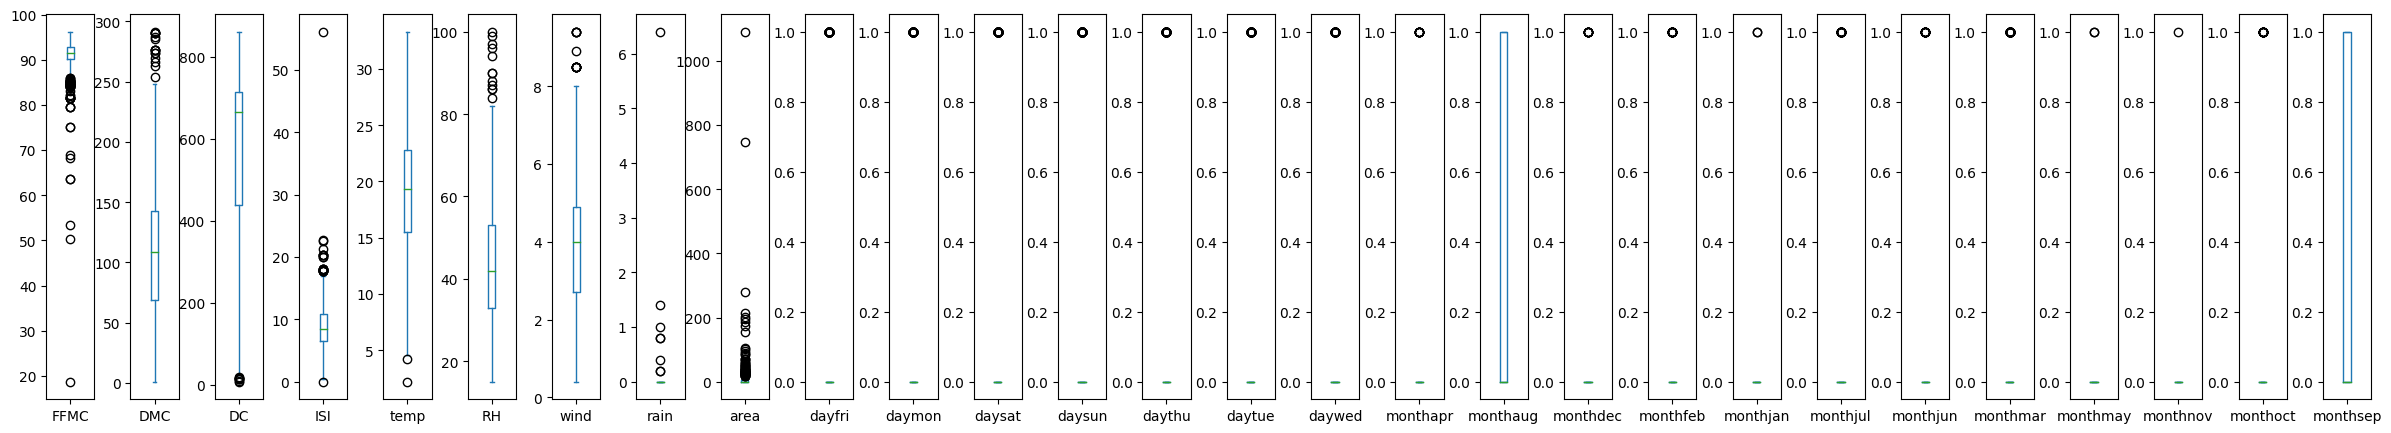

In [11]:
# box plot visualisation
forest_df.plot(kind = 'box', subplots = True, sharey = False, figsize = (30,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()
#outliers in FFMC, DMC, DC, ISI, temp, RH, wind, rain, area column

In [ ]:
# low variation in columns 'rain', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct'

In [8]:
# Seperating input and output variables 
X = pd.DataFrame(forest_df.iloc[:, [2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]])
Y = pd.DataFrame(forest_df.iloc[:, 10])

In [9]:
X.shape

(517, 27)

## Data Preprocessing

In [10]:
# Select numeric features for data preprocessing
numeric_features = X.select_dtypes(exclude = ['object']).columns
print(numeric_features)

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'dayfri',
       'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr',
       'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun',
       'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep'],
      dtype='object')


In [11]:
categorical_features = X.select_dtypes(include = ['object']).columns
print(categorical_features)

Index([], dtype='object')


In [12]:
# Winsorization for "Number of Referrals" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['FFMC'])

X['FFMC'] = winsor.fit_transform(X[['FFMC']])

In [13]:
# Winsorization for "Number of Referrals" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['DMC'])

X['DMC'] = winsor.fit_transform(X[['DMC']])

In [14]:
# Winsorization for "Number of Referrals" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['DC'])

X['DC'] = winsor.fit_transform(X[['DC']])

In [15]:
# Winsorization for "Number of Referrals" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['ISI'])

X['ISI'] = winsor.fit_transform(X[['ISI']])

In [16]:
# Winsorization for "Number of Referrals" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['temp'])

X['temp'] = winsor.fit_transform(X[['temp']])

In [17]:
# Winsorization for "Number of Referrals" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['RH'])

X['RH'] = winsor.fit_transform(X[['RH']])

In [18]:
# Winsorization for "Number of Referrals" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['wind'])

X['wind'] = winsor.fit_transform(X[['wind']])

In [19]:
X.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,91.302224,110.047969,548.079884,8.869729,18.894391,44.092843,4.002321,0.021663,0.164410,0.143133,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,2.523609,61.982439,247.766761,3.882927,5.792743,15.772212,1.751631,0.295959,0.371006,0.350548,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,86.150000,1.100000,23.400000,0.050000,4.550000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,253.100000,860.600000,17.250000,33.300000,83.000000,8.200000,6.400000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
## Scaling with MinMaxScaler
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, numeric_features)]) # Skips the transformations for remaining columns

scale = scale_columntransfer.fit(X)

In [21]:
scaled_data = pd.DataFrame(scale.transform(X), columns = numeric_features)
scaled_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.512659,0.432333,0.626708,0.512775,0.498935,0.427836,0.461836,0.003385,0.164410,0.143133,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,0.251105,0.245962,0.295947,0.225752,0.201487,0.231944,0.224568,0.046244,0.371006,0.350548,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.402985,0.267857,0.494864,0.375000,0.380870,0.264706,0.294872,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542289,0.425397,0.765409,0.485465,0.513043,0.397059,0.461538,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.671642,0.560714,0.824773,0.625000,0.634783,0.558824,0.576923,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
# scaling the target variable.
num_features = ['area']
## Scaling with MinMaxScaler
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, num_features)]) # Skips the transformations for remaining columns

scale1 = scale_columntransfer.fit(Y)

In [23]:
scaled_Y = pd.DataFrame(scale1.transform(Y), columns = num_features)
scaled_Y.describe()

,area
count,517.000000
mean,0.011777
std,0.058355
min,0.000000
25%,0.000000
50%,0.000477
75%,0.006023
max,1.000000


In [24]:
# Splitting data into training and testing data set
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, scaled_Y, test_size = 0.2, random_state = 0) 

In [25]:
X_train.shape

(413, 27)

In [26]:
X_test.shape

(104, 27)

In [27]:
Y_train.shape

(413, 1)

In [28]:
Y_train.head()

,area
386,0.022542
56,0.000000
457,0.075859
60,0.000000
229,0.065362


## Model Building

### Building a Multi layer Perceptron model for which we are giving the input to train the ANN.

In [29]:
# Initializing the model
model = Sequential()
model.add(Dense(20, input_dim = 27, activation = "relu"))
model.add(Dense(20, activation = "tanh"))
model.add(Dense(20, activation = "tanh"))
model.add(Dense(20, activation = "tanh"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss = "mse", optimizer = "adam", metrics = [tf.keras.metrics.MeanAbsoluteError()])

In [30]:
# fitting model on train data
model.fit(x = X_train, y = Y_train, batch_size = 10, epochs = 50, verbose = 1, validation_data = (X_test, Y_test))

Epoch 1/50
42/42 [==============================] - 1s 6ms/step - loss: 0.1260 - mean_absolute_error: 0.3192 - val_loss: 0.0208 - val_mean_absolute_error: 0.1182
Epoch 2/50
42/42 [==============================] - 0s 3ms/step - loss: 0.0069 - mean_absolute_error: 0.0724 - val_loss: 0.0116 - val_mean_absolute_error: 0.0572
Epoch 3/50
42/42 [==============================] - 0s 2ms/step - loss: 0.0032 - mean_absolute_error: 0.0441 - val_loss: 0.0107 - val_mean_absolute_error: 0.0454
Epoch 4/50
42/42 [==============================] - 0s 2ms/step - loss: 0.0025 - mean_absolute_error: 0.0348 - val_loss: 0.0105 - val_mean_absolute_error: 0.0398
Epoch 5/50
42/42 [==============================] - 0s 2ms/step - loss: 0.0022 - mean_absolute_error: 0.0296 - val_loss: 0.0103 - val_mean_absolute_error: 0.0363
Epoch 6/50
42/42 [==============================] - 0s 2ms/step - loss: 0.0020 - mean_absolute_error: 0.0261 - val_loss: 0.0103 - val_mean_absolute_error: 0.0338
Epoch 7/50
42/42 [==========

In [31]:
# Prediction on test data
results = pd.DataFrame(model.predict(X_test, verbose = 1))
results

4/4 [==============================] - 0s 2ms/step


,0
0,0.009367
1,0.009189
2,0.008565
3,0.009011
4,0.010602
...,...
99,0.008236
100,0.009367
101,0.009955
102,0.007277


In [32]:
# Evaluating the model on test data  
eval_score_test = model.evaluate(X_test, Y_test, verbose = 1)
# Accuracy on test data set
print ("Accuracy: %.3f%%" %((1-eval_score_test[1])*100))

4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mean_absolute_error: 0.0239
Accuracy: 97.612%


In [33]:
# Accuracy score on train data 
eval_score_train = model.evaluate(X_train,Y_train,verbose=0)
print ("Accuracy: %.3f%%" %((1-eval_score_train[1])*100))

Accuracy: 98.676%
